# Double exponetial filtering to make neuronal potentials from spikes

Double exponetial {filtering = smoothing} to make neuronal potentials from spikes

$$s_0 = x_0$$
$$b_0 = x_1 - x_0$$
$$s_t = \alpha x_t + (1 - \alpha) (s_{t-1} - b_{t-1})$$
$$b_t = \beta (s_t - s_{t-1}) + (1 - \beta) b_{t-1}$$
$$t = 1, 2, 3, \ldots , T-1$$
$$0 < \alpha < 1$$
$$0 < \beta < 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100

In [3]:
X = (np.random.randint(0, 2, T) * np.random.randint(0, 2, T) * np.random.randint(0, 2, T))

In [4]:
X.shape

(100,)

<StemContainer object of 3 artists>

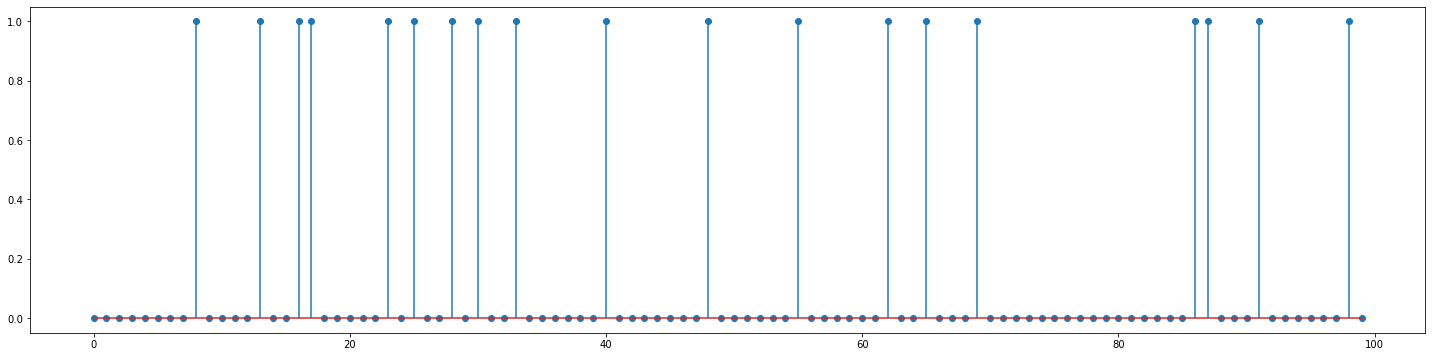

In [9]:
plt.figure(figsize=(25, 6))
plt.stem(np.arange(len(X)), X)

In [6]:
def double_exponential_filtering(X, alpha, beta, T):
    S = np.zeros(T)
    B = np.zeros(T)
    S[0] = X[0]
    B[0] = X[1] - X[0]
    for i in range(1, T):
        S[i] = alpha * X[i] + (1 - alpha) * (S[i-1] - B[i-1])
        B[i] = beta * (S[i] - S[i-1]) + (1 - beta) * B[i-1]
    return S, B

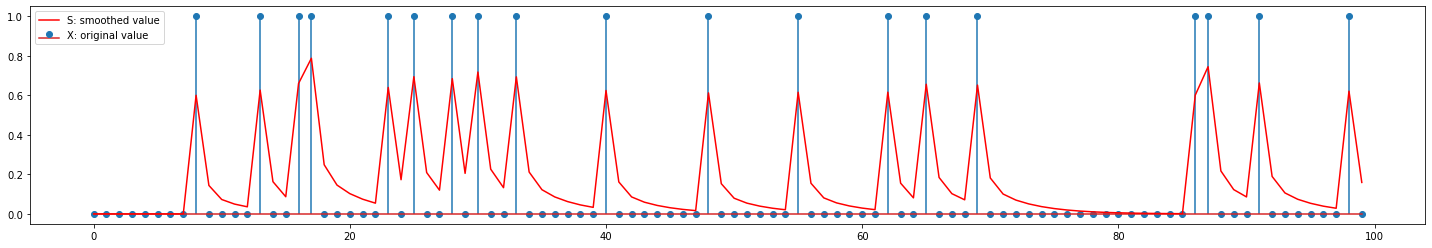

In [10]:
S, B = double_exponential_filtering(X, 0.6, 0.4, T)
plt.figure(figsize=(25, 4))
plt.stem(np.arange(len(X)), X, label='X: original value')
#plt.plot(np.arange(len(B)), B, color='green', marker='o', label='B: estimated trend')
plt.plot(np.arange(len(S)), S, color='red', label='S: smoothed value')
plt.legend()